In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# subjects names
subject_test = pd.read_csv(r".\data\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt", header=None)
subject_train = pd.read_csv(r".\data\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt", header=None)

In [3]:
# TRAINING DATA

X_train = pd.read_csv('.\data\csv_data\X_train.csv')
y_train = pd.read_csv('.\data\csv_data\y_train.csv')

# aggiungere subject al train
X_train['Subject'] = subject_train[0]

# mapping labels to y_train
y_train_labels = y_train.Label.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe train
train = X_train
train['Label'] = y_train
train['Activity'] = y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Label,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
# TESTING DATA

X_test = pd.read_csv('.\data\csv_data\X_test.csv')
y_test = pd.read_csv('.\data\csv_data\y_test.csv')

# aggiungere subject al test
X_test['Subject'] = subject_test[0]

# mapping labels to y_test
y_test_labels = y_test.Label.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe test
test = X_test
test['Label'] = y_test
test['Activity'] = y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Label,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


# DATA VISUALIZATION

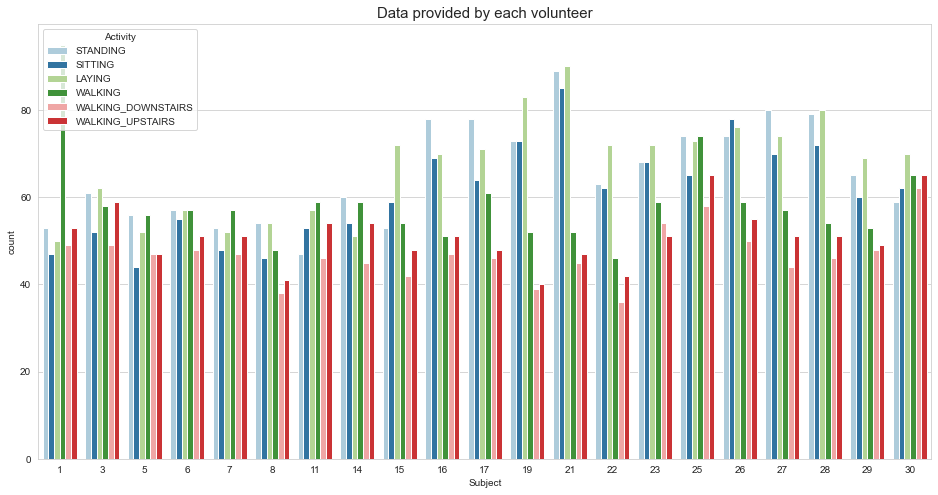

In [10]:
# BAR PLOT: data provided by each user (training data)
plt.figure(figsize=(16,8))
plt.title('Data provided by each volunteer', fontsize=15)
sns.countplot(x='Subject', hue='Activity', data=train, palette='Paired')
plt.show()

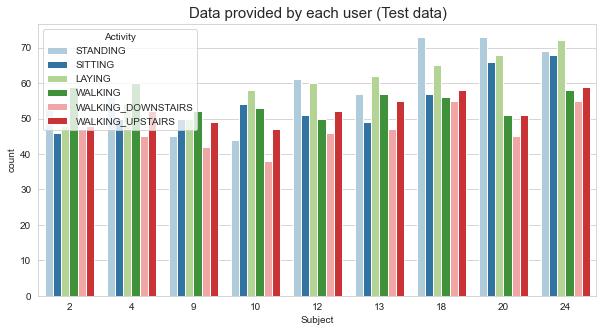

In [6]:
# BAR PLOT: data provided by each user (testing data)
plt.figure(figsize=(10,5))
plt.title('Data provided by each user (Test data)', fontsize=15)
sns.countplot(x='Subject', hue='Activity', data=test, palette='Paired')
plt.show()

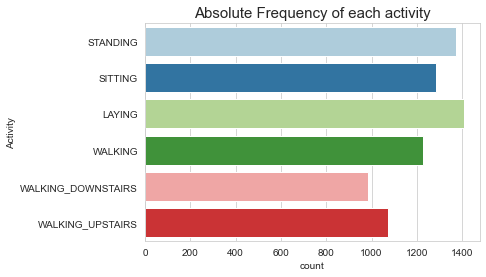

In [9]:
# BAR PLOT: frequenza classi (train data)
plt.title('Absolute Frequency of each activity', fontsize=15)
sns.countplot(y='Activity', data=train, palette='Paired')
#sns.color_palette("Paired")
plt.show()

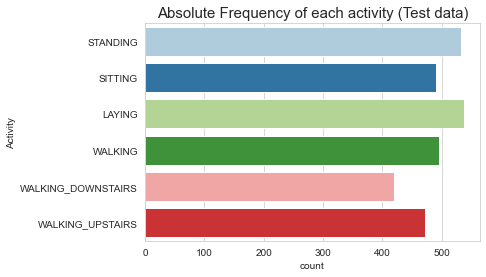

In [8]:
# BAR PLOT: frequenza classi (test data)
plt.title('Absolute Frequency of each activity (Test data)', fontsize=15)
sns.countplot(y='Activity', data=test, palette='Paired')
#sns.color_palette("Paired")
plt.show()

## tSNE for data visualization in 2D

In [11]:
from sklearn.manifold import TSNE

In [12]:
X = train.drop(['Subject', 'Label', 'Activity'], axis=1)

In [13]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne.shape

(7352, 2)

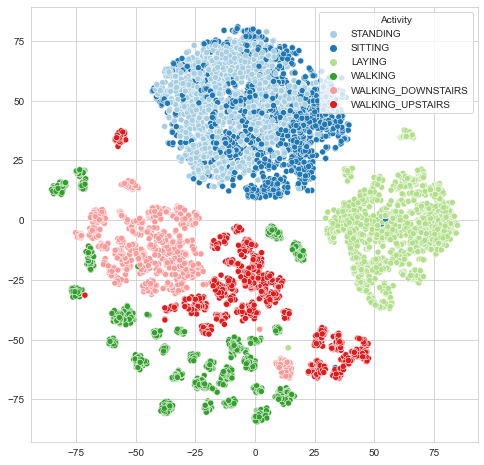

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_tsne[:, 0],y=X_tsne[:, 1], hue=train['Activity'], palette='Paired')
plt.show()

## PCA for data visualization in 2D

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(7352, 2)

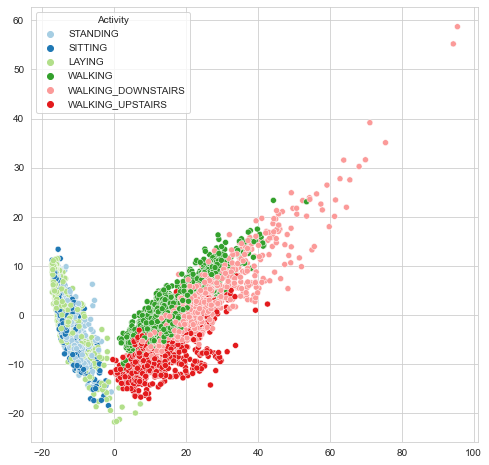

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_pca[:, 0],y=X_pca[:, 1], hue=train['Activity'], palette='Paired')
plt.show()

## Isomap for data visualization in 2D

In [19]:
from sklearn.manifold import Isomap

In [20]:
iso = Isomap(n_components=2)
X_iso = iso.fit_transform(X)
X_iso.shape

(7352, 2)

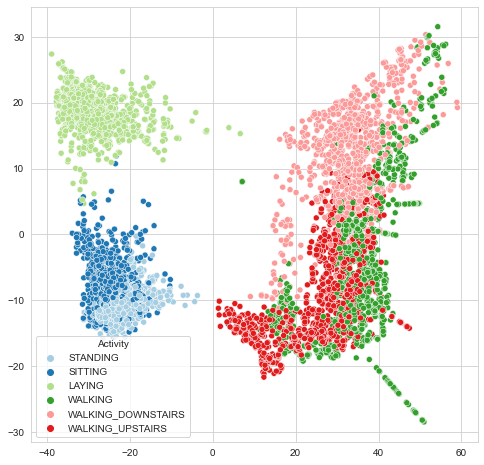

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_iso[:, 0],y=X_iso[:, 1], hue=train['Activity'], palette='Paired')
plt.show()